In [1]:
%config IPCompleter.greedy=True
%matplotlib inline

In [2]:
import pandas as pd, numpy as np, os, sys
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from IPython.display import display, HTML

font = {'size'   : 18}
matplotlib.rc('font', **font)

def plotHorizontalBars(series, xlabel, title):
    xpos = np.arange(len(series.index), 0, -1)
    plt.barh(xpos, series, align='center', alpha=0.5, color='g')
    plt.grid(axis='x')
    plt.yticks(xpos, series.index)
    plt.xlabel(xlabel)
    plt.title(title)

def plotVerticalBars(series, ylabel, title):
    xpos = np.arange(len(series.index), 0, -1)
    plt.bar(xpos, series, align='center', alpha=0.5, color='g')
    plt.grid(axis='y')
    plt.xticks(xpos, series.index)
    plt.ylabel(ylabel)
    plt.title(title)

In [3]:
import ssl, re
ssl._create_default_https_context = ssl._create_unverified_context
pd.__version__

'0.25.3'

In [4]:
# on Github, open CSV file and click on 'Raw'. Copy URL

filename = 'time_series_19-covid-Confirmed.csv'
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'+filename
ts_df = pd.read_csv(data_url)
ts_df = ts_df[~ts_df['Province/State'].astype(str).map(lambda x: re.search('Diamond Princess', x) is not None)]
ts_df = ts_df[~ts_df['Province/State'].astype(str).map(lambda x: re.search('Grand Princess', x) is not None)]
ts_df = ts_df.sort_values(['Country/Region', 'Province/State'])
print(ts_df['Country/Region'].unique())
display(ts_df)

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus'
 'Belgium' 'Bhutan' 'Bosnia and Herzegovina' 'Brazil' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Cambodia' 'Cameroon' 'Canada' 'Channel Islands' 'Chile'
 'Colombia' 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark'
 'Dominican Republic' 'Ecuador' 'Egypt' 'Estonia' 'Faroe Islands'
 'Finland' 'France' 'French Guiana' 'Georgia' 'Germany' 'Gibraltar'
 'Greece' 'Holy See' 'Hong Kong' 'Hong Kong SAR' 'Hungary' 'Iceland'
 'India' 'Indonesia' 'Iran' 'Iran (Islamic Republic of)' 'Iraq' 'Ireland'
 'Israel' 'Italy' 'Japan' 'Jordan' 'Kuwait' 'Latvia' 'Lebanon'
 'Liechtenstein' 'Lithuania' 'Luxembourg' 'Macao SAR' 'Macau'
 'Mainland China' 'Malaysia' 'Maldives' 'Malta' 'Martinique' 'Mexico'
 'Moldova' 'Monaco' 'Mongolia' 'Morocco' 'Nepal' 'Netherlands'
 'New Zealand' 'Nigeria' 'North Macedonia' 'Norway' 'Oman' 'Pakistan'
 'Palestine' 'Panama' 'Paraguay' 'Peru' '

Province/State                  Country/Region      Lat      Long  \
80             NaN                     Afghanistan  33.0000   65.0000   
252            NaN                         Albania  41.1533   20.1683   
83             NaN                         Algeria  28.0339    1.6596   
118            NaN                         Andorra  42.5063    1.5218   
133            NaN                       Argentina -38.4161  -63.6167   
..             ...                             ...      ...       ...   
53             NaN            United Arab Emirates  24.0000   54.0000   
188            NaN                    Vatican City  41.9029   12.4534   
275            NaN                        Viet Nam  16.0000  108.0000   
40             NaN                         Vietnam  16.0000  108.0000   
276            NaN  occupied Palestinian territory  31.9522   35.2332   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  3/1/20  \
80         0        0        0        0        0        0  ...       1   
252        0        0        0        0        0        0  ...       0   
83         0        0        0        0        0        0  ...       1   
118        0        0        0        0        0        0  ...       0   
133        0        0        0        0        0        0  ...       0   
..       ...      ...      ...      ...      ...      ...  ...     ...   
53         0        0        0        0        0        0  ...      21   
188        0        0        0        0        0        0  ...       0   
275        0        0        0        0        0        0  ...       0   
40         0        2        2        2        2        2  ...      16   
276        0        0        0        0        0        0  ...       0   

     3/2/20  3/3/20  3/4/20  3/5/20  3/6/20  3/7/20  3/8/20  3/9/20  3/10/20  
80        1       1       1       1       1       1       4       4      5.0  
252       0       0       0       0       0       0       0       2     10.0  
83        3       5      12      12      17      17      19      20     20.0  
118       1       1       1       1       1       1       1       1      1.0  
133       0       1       1       1       2       8      12      12     17.0  
..      ...     ...     ...     ...     ...     ...     ...     ...      ...  
53       21      27      27      29      29      45      45      45     74.0  
188       0       0       0       0       1       1       1       1      NaN  
275       0       0       0       0       0       0       0       0     31.0  
40       16      16      16      16      16      18      30      30      NaN  
276       0       0       0       0       0       0       0       0     25.0  

[324 rows x 53 columns]

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

lin_df = ts_df.drop(['Lat', 'Long', 'Province/State'], axis=1)
lin_df = lin_df.groupby('Country/Region').sum().transpose()
lin_df['date_count'] = [i for i in range(lin_df.shape[0])]
display(lin_df.tail(7))

Country/Region  Afghanistan  Albania  Algeria  Andorra  Argentina  Armenia  \
3/4/20                  1.0      0.0     12.0      1.0        1.0      1.0   
3/5/20                  1.0      0.0     12.0      1.0        1.0      1.0   
3/6/20                  1.0      0.0     17.0      1.0        2.0      1.0   
3/7/20                  1.0      0.0     17.0      1.0        8.0      1.0   
3/8/20                  4.0      0.0     19.0      1.0       12.0      1.0   
3/9/20                  4.0      2.0     20.0      1.0       12.0      1.0   
3/10/20                 5.0     10.0     20.0      1.0       17.0      1.0   

Country/Region  Australia  Austria  Azerbaijan  Bahrain  Bangladesh  Belarus  \
3/4/20               52.0     29.0         3.0     52.0         0.0      6.0   
3/5/20               55.0     41.0         6.0     55.0         0.0      6.0   
3/6/20               60.0     55.0         6.0     60.0         0.0      6.0   
3/7/20               63.0     79.0         9.0     85.0         0.0      6.0   
3/8/20               76.0    104.0         9.0     85.0         3.0      6.0   
3/9/20               91.0    131.0         9.0     95.0         3.0      6.0   
3/10/20             107.0    182.0        11.0    110.0         3.0      9.0   

Country/Region  Belgium  Bhutan  Bosnia and Herzegovina  Brazil  Brunei  \
3/4/20             23.0     0.0                     0.0     4.0     0.0   
3/5/20             50.0     0.0                     2.0     4.0     0.0   
3/6/20            109.0     1.0                     2.0    13.0     0.0   
3/7/20            169.0     1.0                     3.0    13.0     0.0   
3/8/20            200.0     1.0                     3.0    20.0     0.0   
3/9/20            239.0     1.0                     3.0    25.0     1.0   
3/10/20           267.0     1.0                     5.0    31.0     1.0   

Country/Region  Bulgaria  Burkina Faso  Cambodia  Cameroon  Canada  \
3/4/20               0.0           0.0       1.0       0.0    33.0   
3/5/20               0.0           0.0       1.0       0.0    37.0   
3/6/20               0.0           0.0       1.0       1.0    49.0   
3/7/20               0.0           0.0       1.0       1.0    54.0   
3/8/20               4.0           0.0       2.0       2.0    64.0   
3/9/20               4.0           0.0       2.0       2.0    77.0   
3/10/20              4.0           1.0       2.0       2.0    79.0   

Country/Region  Channel Islands  Chile  Colombia  Costa Rica  Croatia  Cyprus  \
3/4/20                      0.0    1.0       0.0         0.0     10.0     0.0   
3/5/20                      0.0    4.0       0.0         0.0     10.0     0.0   
3/6/20                      0.0    4.0       1.0         1.0     11.0     0.0   
3/7/20                      0.0    4.0       1.0         1.0     12.0     0.0   
3/8/20                      0.0    8.0       1.0         5.0     12.0     0.0   
3/9/20                      0.0    8.0       1.0         9.0     12.0     2.0   
3/10/20                     1.0   13.0       3.0         9.0     14.0     3.0   

Country/Region  Czech Republic  Denmark  Dominican Republic  Ecuador  Egypt  \
3/4/20                     8.0     10.0                 1.0     10.0    2.0   
3/5/20                    12.0     10.0                 1.0     13.0    3.0   
3/6/20                    18.0     23.0                 2.0     13.0   15.0   
3/7/20                    19.0     23.0                 2.0     13.0   15.0   
3/8/20                    31.0     35.0                 5.0     14.0   49.0   
3/9/20                    31.0     90.0                 5.0     15.0   55.0   
3/10/20                   41.0    262.0                 5.0     15.0   59.0   

Country/Region  Estonia  Faroe Islands  Finland  France  French Guiana  \
3/4/20              2.0            1.0      6.0   285.0            0.0   
3/5/20              3.0            1.0     12.0   377.0            0.0   
3/6/20             10.0            1.0     15.0   653.0            0

In [6]:
log_df = lin_df.copy()
log_df[log_df == 0] = 1e-5
log_df = np.log(log_df)
log_df[log_df < 0.1] = 0.0
log_df.date_count = lin_df.date_count
display(log_df.head(4))

Country/Region  Afghanistan  Albania  Algeria  Andorra  Argentina  Armenia  \
1/22/20                 0.0      0.0      0.0      0.0        0.0      0.0   
1/23/20                 0.0      0.0      0.0      0.0        0.0      0.0   
1/24/20                 0.0      0.0      0.0      0.0        0.0      0.0   
1/25/20                 0.0      0.0      0.0      0.0        0.0      0.0   

Country/Region  Australia  Austria  Azerbaijan  Bahrain  Bangladesh  Belarus  \
1/22/20               0.0      0.0         0.0      0.0         0.0      0.0   
1/23/20               0.0      0.0         0.0      0.0         0.0      0.0   
1/24/20               0.0      0.0         0.0      0.0         0.0      0.0   
1/25/20               0.0      0.0         0.0      0.0         0.0      0.0   

Country/Region  Belgium  Bhutan  Bosnia and Herzegovina  Brazil  Brunei  \
1/22/20             0.0     0.0                     0.0     0.0     0.0   
1/23/20             0.0     0.0                     0.0     0.0     0.0   
1/24/20             0.0     0.0                     0.0     0.0     0.0   
1/25/20             0.0     0.0                     0.0     0.0     0.0   

Country/Region  Bulgaria  Burkina Faso  Cambodia  Cameroon  Canada  \
1/22/20              0.0           0.0       0.0       0.0     0.0   
1/23/20              0.0           0.0       0.0       0.0     0.0   
1/24/20              0.0           0.0       0.0       0.0     0.0   
1/25/20              0.0           0.0       0.0       0.0     0.0   

Country/Region  Channel Islands  Chile  Colombia  Costa Rica  Croatia  Cyprus  \
1/22/20                     0.0    0.0       0.0         0.0      0.0     0.0   
1/23/20                     0.0    0.0       0.0         0.0      0.0     0.0   
1/24/20                     0.0    0.0       0.0         0.0      0.0     0.0   
1/25/20                     0.0    0.0       0.0         0.0      0.0     0.0   

Country/Region  Czech Republic  Denmark  Dominican Republic  Ecuador  Egypt  \
1/22/20                    0.0      0.0                 0.0      0.0    0.0   
1/23/20                    0.0      0.0                 0.0      0.0    0.0   
1/24/20                    0.0      0.0                 0.0      0.0    0.0   
1/25/20                    0.0      0.0                 0.0      0.0    0.0   

Country/Region  Estonia  Faroe Islands  Finland    France  French Guiana  \
1/22/20             0.0            0.0      0.0  0.000000            0.0   
1/23/20             0.0            0.0      0.0  0.000000            0.0   
1/24/20             0.0            0.0      0.0  0.693147            0.0   
1/25/20             0.0            0.0      0.0  1.098612            0.0   

Country/Region  Georgia  Germany  Gibraltar  Greece  Holy See  Hong Kong  \
1/22/20             0.0      0.0        0.0     0.0       0.0   0.000000   
1/23/20             0.0      0.0        0.0     0.0       0.0   0.693147   
1/24/20             0.0      0.0        0.0     0.0       0.0   0.693147   
1/25/20             0.0      0.0        0.0     0.0       0.0   1.609438   

Country/Region  Hong Kong SAR  Hungary  Iceland  India  Indonesia  Iran  \
1/22/20                   0.0      0.0      0.0    0.0        0.0   0.0   
1/23/20                   0.0      0.0      0.0    0.0        0.0   0.0   
1/24/20                   0.0      0.0      0.0    0.0        0.0   0.0   
1/25/20                   0.0      0.0      0.0    0.0        0.0   0.0   

Country/Region  Iran (Islamic Republic of)  Iraq  Ireland  Israel  Italy  \
1/22/20                                0.0   0.0      0.0     0.0    0.0   
1/23/20                                0.0   0.0      0.0     0.0    0.0   
1/24/20                                0.0   0.0      0.0     0.0    0.0   
1/25/20                                0.0   0.0      0.0     0.0    0.0   

Country/Region     Japan  Jordan  Kuwait  Latvia  Lebanon  Liechtenstein  \
1/22/20         0.693147     0.0     0.0     0.0      0.0            0.0   
1/23/20 

Country/Region  date_count     US    Italy  South Korea  Germany  France  \
3/4/20                  42  107.0   3089.0       5621.0    262.0   285.0   
3/5/20                  43  175.0   3858.0       6088.0    482.0   377.0   
3/6/20                  44  232.0   4636.0       6593.0    670.0   653.0   
3/7/20                  45  350.0   5883.0       7041.0    799.0   949.0   
3/8/20                  46  471.0   7375.0       7314.0   1040.0  1126.0   
3/9/20                  47  539.0   9172.0       7478.0   1176.0  1209.0   
3/10/20                 48  892.0  10149.0          0.0   1457.0  1784.0   

Country/Region    Iran  
3/4/20          2922.0  
3/5/20          3513.0  
3/6/20          4747.0  
3/7/20          5823.0  
3/8/20          6566.0  
3/9/20          7161.0  
3/10/20            0.0

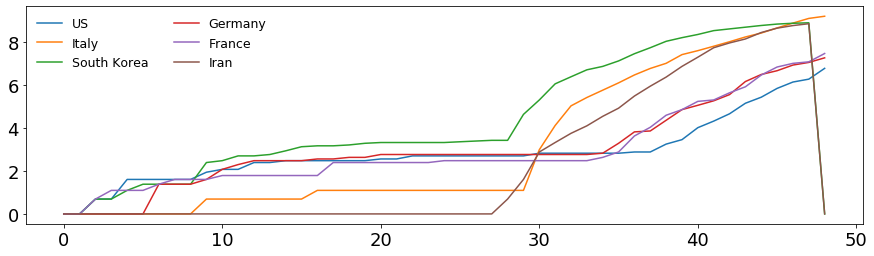

In [7]:
countries = ['Mainland China', 'US', 'Italy', 'South Korea', 'Germany']
countries = ['US', 'Italy', 'South Korea', 'Germany', 'France', 'Iran']
display(lin_df[['date_count'] + countries].tail(7))

fig, ax = plt.subplots(figsize=(15, 4))
for country in countries:
    ax.plot(log_df.date_count, log_df[country], label=country)
ax.legend(frameon=False, ncol=2, fontsize='x-small')

(11, 2)


Country/Region  date_count     US
2/28/20                 37   18.0
2/29/20                 38   26.0
3/1/20                  39   32.0
3/2/20                  40   56.0
3/3/20                  41   76.0
3/4/20                  42  107.0
3/5/20                  43  175.0
3/6/20                  44  232.0
3/7/20                  45  350.0
3/8/20                  46  471.0
3/9/20                  47  539.0

Intercept: [-10.37081929]
Slope: [[0.35851983]]


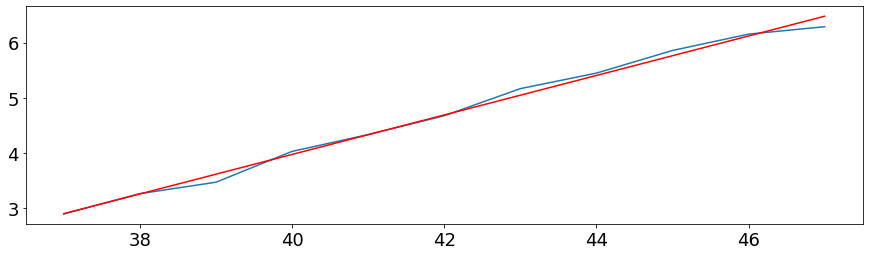

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

country = 'US'
df = lin_df[['date_count', country]].copy()
df = df[df.date_count >= 37]
df = df.head(df.shape[0]-1)
#df = df[df.date_count <= 20]
print(df.shape)
display(df)

x = df.date_count.values.reshape(-1, 1)
y = df[country].values.reshape(-1, 1)
y = np.log(y)
regressor = LinearRegression()
regressor.fit(x, y)
y_fit = regressor.predict(x)

print('Intercept:', regressor.intercept_)
print('Slope:', regressor.coef_)

plt.figure(figsize=(15, 4))
plt.plot(x, y)
plt.plot(x, y_fit, color='red')
plt.show()

In [12]:
x_fut = x.copy()
x_fut -= x.min()
x_fut += x.max()
y_fut = regressor.predict(x_fut)
print(y_fut)
y_fut = np.exp(y_fut)
mat = np.c_[x_fut, y_fut].astype(int)
print(mat)

[[ 6.47961261]
 [ 6.83813244]
 [ 7.19665227]
 [ 7.5551721 ]
 [ 7.91369192]
 [ 8.27221175]
 [ 8.63073158]
 [ 8.98925141]
 [ 9.34777123]
 [ 9.70629106]
 [10.06481089]]
[[   47   651]
 [   48   932]
 [   49  1334]
 [   50  1910]
 [   51  2734]
 [   52  3913]
 [   53  5601]
 [   54  8016]
 [   55 11473]
 [   56 16420]
 [   57 23501]]
